# Basic Model Comparison

Comparing performance of basic machine learning models using cross-validation results.


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load basic model results
results_dir = '../../models/basic/'

try:
    with open(f'{results_dir}/linear_results.pkl', 'rb') as f:
        linear_results = pickle.load(f)
    with open(f'{results_dir}/ridge_results.pkl', 'rb') as f:
        ridge_results = pickle.load(f)
    with open(f'{results_dir}/random_forest_results.pkl', 'rb') as f:
        rf_results = pickle.load(f)
    
    print("✓ All basic model results loaded")
    
except FileNotFoundError as e:
    print(f"⚠️ Missing results file: {e}")
    print("Please run notebooks 3-1, 3-2, and 3-3 first")


✓ All basic model results loaded


In [2]:
# Performance comparison table
comparison_data = []
for results in [linear_results, ridge_results, rf_results]:
    comparison_data.append({
        'Model': results['model_name'],
        'RMSE': results['cv_rmse'],
        'RMSE_std': results['cv_rmse_std'],
        'MAE': results['cv_mae'],
        'MAE_std': results['cv_mae_std'],
        'R²': results['cv_r2'],
        'R²_std': results['cv_r2_std']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('RMSE')  # Sort by RMSE (lower is better)

print("=== BASIC MODEL PERFORMANCE COMPARISON ===")
print("\nCross-Validation Results (5-fold):")
print("-" * 80)
for _, row in comparison_df.iterrows():
    print(f"{row['Model']:<20} RMSE: ${row['RMSE']:>7,.0f} (±{row['RMSE_std']:>4,.0f})  "
          f"MAE: ${row['MAE']:>7,.0f} (±{row['MAE_std']:>3,.0f})  R²: {row['R²']:>6.4f} (±{row['R²_std']:>5.4f})")
print("-" * 80)


=== BASIC MODEL PERFORMANCE COMPARISON ===

Cross-Validation Results (5-fold):
--------------------------------------------------------------------------------
Ridge Regression     RMSE: $ 22,145 (±1,302)  MAE: $ 14,284 (±651)  R²: 0.9158 (±0.0215)
Random Forest        RMSE: $ 29,739 (±7,142)  MAE: $ 17,736 (±1,197)  R²: 0.8563 (±0.0373)
Linear Regression    RMSE: $ 29,948 (±2,390)  MAE: $ 20,099 (±1,270)  R²: 0.8448 (±0.0450)
--------------------------------------------------------------------------------


In [3]:
# Best model summary based on cross-validation
best_model = comparison_df.iloc[0]
print(f"\n🏆 Best Model (Based on CV): {best_model['Model']}")
print(f"   RMSE: ${best_model['RMSE']:,.0f} (±${best_model['RMSE_std']:,.0f})")
print(f"   MAE:  ${best_model['MAE']:,.0f} (±${best_model['MAE_std']:,.0f})")
print(f"   R²:   {best_model['R²']:.4f} (±{best_model['R²_std']:.4f})")
print(f"\nNote: Full training accuracy will be evaluated only for the final selected model.")



🏆 Best Model (Based on CV): Ridge Regression
   RMSE: $22,145 (±$1,302)
   MAE:  $14,284 (±$651)
   R²:   0.9158 (±0.0215)

Note: Full training accuracy will be evaluated only for the final selected model.


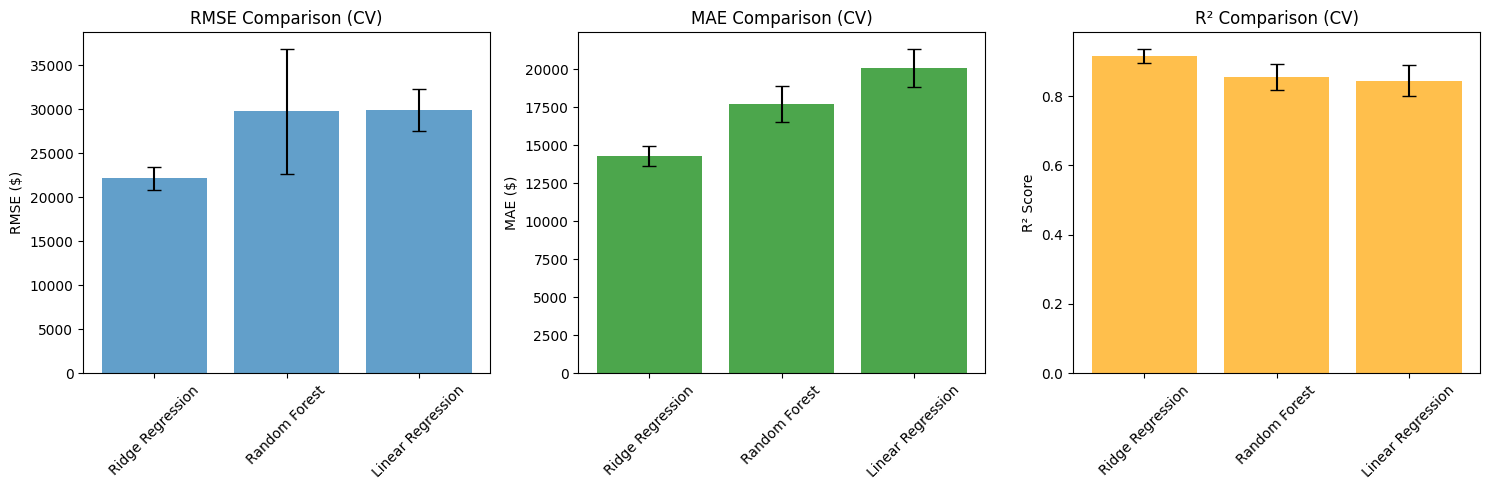

In [4]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RMSE comparison
axes[0].bar(comparison_df['Model'], comparison_df['RMSE'], 
           yerr=comparison_df['RMSE_std'], capsize=5, alpha=0.7)
axes[0].set_title('RMSE Comparison (CV)')
axes[0].set_ylabel('RMSE ($)')
axes[0].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1].bar(comparison_df['Model'], comparison_df['MAE'], 
           yerr=comparison_df['MAE_std'], capsize=5, alpha=0.7, color='green')
axes[1].set_title('MAE Comparison (CV)')
axes[1].set_ylabel('MAE ($)')
axes[1].tick_params(axis='x', rotation=45)

# R² comparison
axes[2].bar(comparison_df['Model'], comparison_df['R²'], 
           yerr=comparison_df['R²_std'], capsize=5, alpha=0.7, color='orange')
axes[2].set_title('R² Comparison (CV)')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [5]:
# Save comparison results
comparison_summary = {
    'comparison_table': comparison_df.to_dict('records'),
    'best_model': {
        'name': best_model['Model'],
        'rmse': best_model['RMSE'],
        'rmse_std': best_model['RMSE_std'],
        'mae': best_model['MAE'],
        'mae_std': best_model['MAE_std'],
        'r2': best_model['R²'],
        'r2_std': best_model['R²_std']
    },
    'model_ranking': comparison_df['Model'].tolist()
}

import os
os.makedirs('../../models/basic/', exist_ok=True)
with open('../../models/basic/comparison_summary.pkl', 'wb') as f:
    pickle.dump(comparison_summary, f)

# Export to CSV for easy viewing
comparison_df.to_csv('../../models/basic/model_comparison.csv', index=False)

print("✓ Model comparison completed")
print(f"✓ Results saved to models/basic/comparison_summary.pkl")
print(f"✓ CSV exported to models/basic/model_comparison.csv")


✓ Model comparison completed
✓ Results saved to models/basic/comparison_summary.pkl
✓ CSV exported to models/basic/model_comparison.csv
